# Figure 2: Map colored by conditional probabilities

### 1. Load packages

In [1]:
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# from global_land_mask import globe
import scipy.stats as stats
import os
import importlib
import geopandas as gpd
# from tqdm import tqdm
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib.cm as cm

# file containing functions:
import loadquakes
importlib.reload(loadquakes)

<module 'loadquakes' from '/home/bradlipovsky/notebooks/SLIQ/loadquakes.py'>

### 2. Load datasets

In [2]:
# GRACE data
dataset_path = '/data/fast1/surface-load/'
ds = xr.open_dataset(dataset_path + "GRCTellus.JPL.200204_202201.GLO.RL06M.MSCNv02CRI.nc")
catalog = pd.read_csv('catalog.csv')
etas_declustered = pd.read_csv('etas_declustered.csv')
NND_declustered = pd.read_csv('NND_declustered.csv')

### 3. Plot the SLIQs from the full catalog with highest CP

In [3]:
sliq_full=catalog.sort_values('cp',ascending=False)
sliq_full=sliq_full.reset_index()
sliq_full=sliq_full.drop(['index'], axis=1)

sliq_full['dmass']=sliq_full['dmass'].astype(float)

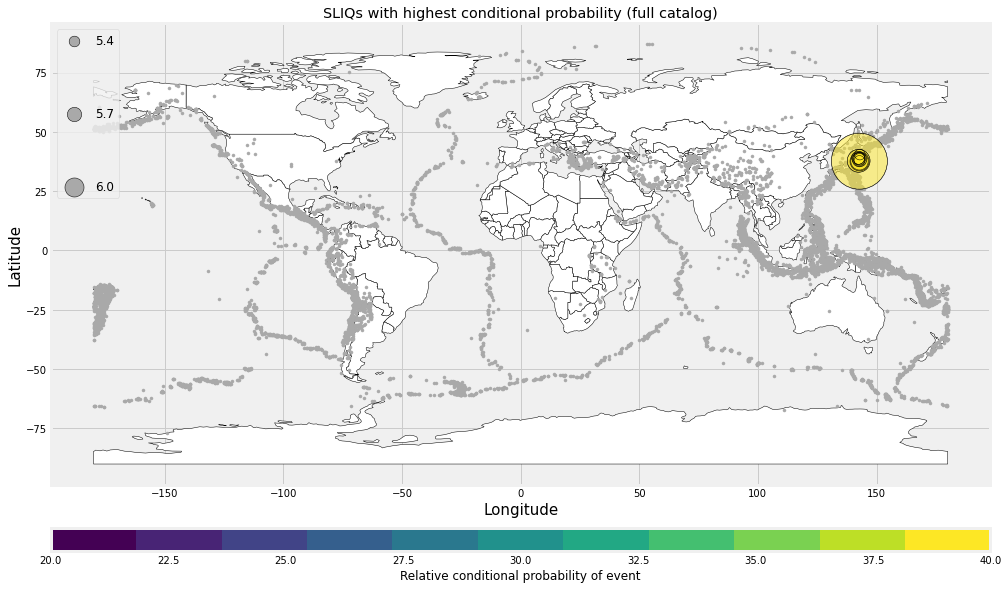

In [4]:
importlib.reload(loadquakes)
plt.style.use('fivethirtyeight')

loadquakes.probability_map_cb(catalog,sliq_full.head(10),sliq_full.cp.head(10), [1,8,6],
                'SLIQs with highest conditional probability (full catalog)',20,40,11)

### Plotting the 10 SLIQs from the ETAS declustered catalog with highest CP

In [5]:
sliq_etas=etas_declustered.sort_values('cp',ascending=False)
sliq_etas=sliq_etas.reset_index()
sliq_etas=sliq_etas.drop(['index'], axis=1)

sliq_etas['dmass']=sliq_etas['dmass'].astype(float)

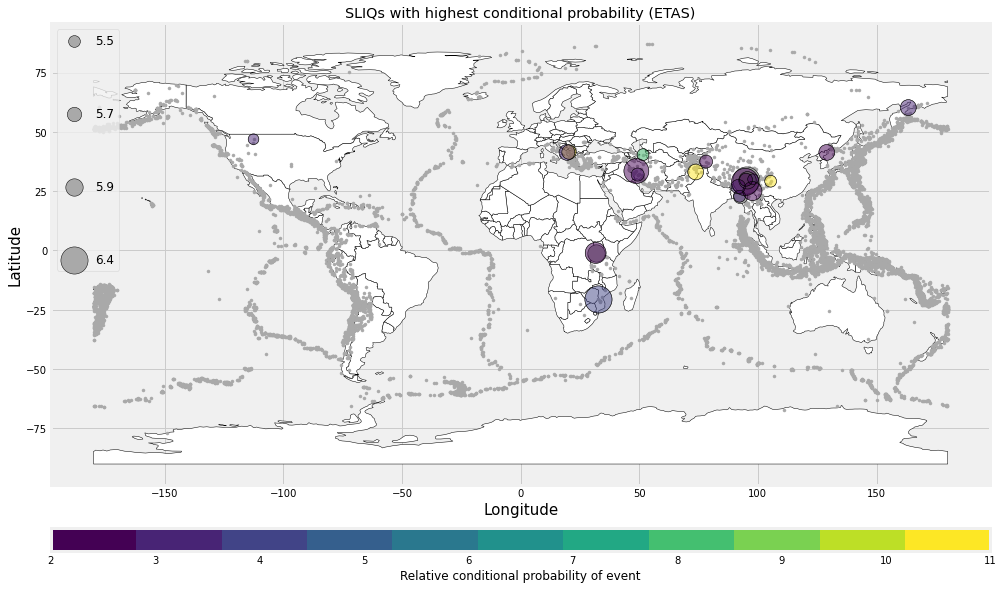

In [6]:
loadquakes.probability_map_cb(catalog,sliq_etas.head(20),sliq_etas.cp.head(20), [1,2,3,5],
                'SLIQs with highest conditional probability (ETAS)',2,11,11)

In [7]:
sliq_nnd=NND_declustered.sort_values('cp',ascending=False)
sliq_nnd=sliq_nnd.reset_index()
sliq_nnd=sliq_nnd.drop(['index'], axis=1)


sliq_nnd['dmass']=sliq_nnd['dmass'].astype(float)

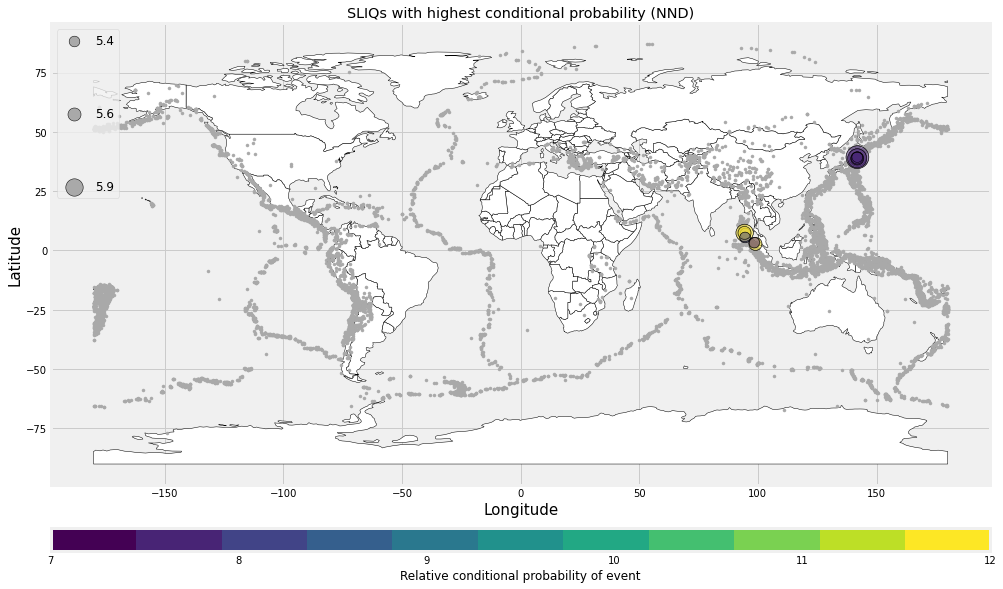

In [8]:
loadquakes.probability_map_cb(catalog,sliq_nnd.head(10),sliq_nnd.head(10).cp, [3,9,1],
                'SLIQs with highest conditional probability (NND)',7,12,11)